# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Halilatunnisa]
- **Email:** [halilatunnisa08@gmail.com]
- **ID Dicoding:** [halilatunnisa]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats

## Data Wrangling

### Gathering Data

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
base_path = "/content/drive/MyDrive/Kuliah/E-Commerce Public Dataset/"

file_names = {
    "orders": "orders_dataset.csv",
    "order_items": "order_items_dataset.csv",
    "products": "products_dataset.csv",
    "payments": "order_payments_dataset.csv",
    "reviews": "order_reviews_dataset.csv",
    "customers": "customers_dataset.csv",
    "sellers": "sellers_dataset.csv",
    "geolocation": "geolocation_dataset.csv",
    "category_translation": "product_category_name_translation.csv"
}

data = {key: pd.read_csv(os.path.join(base_path, value))
        for key, value in file_names.items()}

In [63]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [64]:
data['order_items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [65]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [66]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [67]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [68]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [69]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [70]:
data['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [71]:
data['category_translation'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

Periksa Tipe data

In [72]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

In [73]:
datetime_columns = {
    "orders": [
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date"
    ],
    "order_items": ["shipping_limit_date"],
    "reviews": ["review_creation_date", "review_answer_timestamp"]
}

for table, columns in datetime_columns.items():
    for col in columns:
        data[table][col] = pd.to_datetime(data[table][col])

Periksa Duplikat

In [74]:
jumlah_duplikat = {}
total_data = {}

for nama_df, isi_df in data.items():
    jumlah_duplikat[nama_df] = isi_df.duplicated().sum()
    total_data[nama_df] = isi_df.shape[0]

df_duplikat = pd.DataFrame(jumlah_duplikat.items(),
                           columns=["Dataset", "Jumlah Duplikat"]).set_index("Dataset")

df_total = pd.DataFrame(total_data.items(),
                        columns=["Dataset", "Total Data"]).set_index("Dataset")

hasil_ringkasan = df_total.join(df_duplikat)

hasil_ringkasan

,Total Data,Jumlah Duplikat
Dataset,,
orders,99441,0
order_items,112650,0
products,32951,0
payments,103886,0
reviews,99224,0
customers,99441,0
sellers,3095,0
geolocation,1000163,261831
category_translation,71,0


Periksa Missing Value

In [75]:
jumlah_null = {}

for nama, df in data.items():
    total_null = df.isnull().sum()
    jumlah_null[nama] = total_null

    print(f"Dataset: {nama}")
    print(total_null)
    print("-" * 40)

Dataset: orders
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
----------------------------------------
Dataset: order_items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
----------------------------------------
Dataset: products
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
---------------------------------------

### Cleaning Data

Order

In [76]:
# Untuk analisis ini, hanya fokus pada pesanan yang sudah terkirim
status_pesanan = data["orders"]["order_status"].value_counts()

print(status_pesanan)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [77]:
# Menghitung persentase order dengan status delivered
total_order = len(data["orders"])
jumlah_delivered = data["orders"]["order_status"].value_counts()["delivered"]

persentase_delivered = round((jumlah_delivered / total_order) * 100, 2)

print(f"Jika hanya mengambil pesanan yang delivered, kita masih memiliki {persentase_delivered}% dari total data.")

Jika hanya mengambil pesanan yang delivered, kita masih memiliki 97.02% dari total data.


In [78]:
# Ambil daftar order_id yang bukan delivered
order_tidak_terkirim = data["orders"].loc[
    data["orders"]["order_status"] != "delivered",
    "order_id"
].to_numpy()

# Hapus baris pada setiap dataset yang memiliki order_id tersebut
for nama_tabel, df in data.items():
    if "order_id" in df.columns:
        df.drop(
            df[df["order_id"].isin(order_tidak_terkirim)].index,
            inplace=True
        )

In [79]:
# Persentase nilai kosong di setiap kolom
for nama_df, df in data.items():
    for nama_kolom in df.columns:
        jumlah_kosong = df[nama_kolom].isna().sum()

        if jumlah_kosong > 0:
            persen_kosong = (jumlah_kosong / df.shape[0]) * 100
            print(f"{nama_df} - {nama_kolom} (%): {persen_kosong}")

orders - order_approved_at (%): 0.014511080246273761
orders - order_delivered_carrier_date (%): 0.0020730114637533947
orders - order_delivered_customer_date (%): 0.008292045855013579
products - product_category_name (%): 1.8512336499650999
products - product_name_lenght (%): 1.8512336499650999
products - product_description_lenght (%): 1.8512336499650999
products - product_photos_qty (%): 1.8512336499650999
products - product_weight_g (%): 0.006069618524475737
products - product_length_cm (%): 0.006069618524475737
products - product_height_cm (%): 0.006069618524475737
products - product_width_cm (%): 0.006069618524475737
reviews - review_comment_title (%): 88.36873839001255
reviews - review_comment_message (%): 59.4244559520968


In [80]:
jumlah_tanpa_tanggal_kirim = data["orders"]["order_delivered_customer_date"].isna().sum()

print(f"Terdapat {jumlah_tanpa_tanggal_kirim} pesanan yang belum memiliki tanggal pengiriman.")

Terdapat 8 pesanan yang belum memiliki tanggal pengiriman.


In [81]:
# Ambil order_id yang tidak memiliki tanggal sampai ke customer
order_tanpa_tanggal = data["orders"].loc[
    data["orders"]["order_delivered_customer_date"].isna(),
    "order_id"
].to_numpy()

# Hapus baris terkait di seluruh tabel yang memiliki kolom order_id
for nama_df, df in data.items():
    if "order_id" in df.columns:
        indeks_hapus = df[df["order_id"].isin(order_tanpa_tanggal)].index
        df.drop(index=indeks_hapus, inplace=True)

In [82]:
# Membuat indikator apakah pesanan sampai tepat waktu atau tidak
orders_df = data["orders"]

orders_df["status_ketepatan"] = np.where(
    orders_df["order_delivered_customer_date"]
    < orders_df["order_estimated_delivery_date"],
    "On Time",
    "Late"
)

Reviews

In [83]:
# Melihat daftar kolom pada dataset reviews
print("Kolom pada dataset reviews:", list(data["reviews"].columns))

# Kolom review_comment_title memiliki banyak nilai kosong, jadi dihapus
kolom_dihapus = ["review_comment_title"]

data["reviews"] = data["reviews"].drop(columns=kolom_dihapus)

Kolom pada dataset reviews: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


In [84]:
# Jika tidak ada komentar = 0, jika ada komentar = 1

reviews_df = data["reviews"]

reviews_df["indikator_komentar"] = (
    reviews_df["review_comment_message"]
    .notna()
    .astype(int)
)

Products

In [85]:
# Menampilkan daftar kolom pada dataset products
print("Kolom pada dataset products:", list(data["products"].columns))

# Menghapus kolom yang tidak digunakan dalam analisis
kolom_tidak_dipakai = [
    "product_name_lenght",
    "product_description_lenght",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

data["products"] = data["products"].drop(columns=kolom_tidak_dipakai)

Kolom pada dataset products: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [86]:
# Mengganti nilai kosong pada kategori produk menjadi 'outro'
data["products"]["product_category_name"] = (
    data["products"]["product_category_name"]
    .fillna("outro")
)

In [87]:
# Mengisi nilai kosong pada jumlah foto produk dengan 0
data["products"]["product_photos_qty"] = (
    data["products"]["product_photos_qty"]
    .fillna(0)
)

Geolocations

In [88]:
# Menghapus baris duplikat pada dataset geolocation
data["geolocation"] = data["geolocation"].drop_duplicates()

## Exploratory Data Analysis (EDA)

### Explore Customer

In [89]:
data['customers'].sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
48986,bca2f94b38209f0053cd08495eb44762,1dcda1060646db12f878b6e1eb0ac5dc,17603,tupa,SP
44974,1fc1c90ea86cf0ab56bfb6e442245e7a,65af2ae0625e2d7f0adcff19dda46b88,24322,niteroi,RJ
38621,ca5004c4b586150e829d092c536c0d83,3b5e5806f7dd2e20f1f3ddbca8b3ec4b,2346,sao paulo,SP
28159,78f0a23ab766cbadc53402d12b7ae0a5,04fc5f7b626b7d8082d4a81ec33f8b83,13177,sumare,SP
38649,02eeb440c68d8e3bb1e25ef69130396b,40b76674f7b6e4c28afc00a30a8cb366,81460,curitiba,PR
68865,27fcfc8d27c86e1f52daa7d17fc24ce4,810ba763835fb927c87eaa0a750b5ca3,62595,cruz,CE
22025,89924b0fa5ff89c9df5c6acc7694004e,579e29145534444eb1d20a7ce35e3310,7152,guarulhos,SP
4998,3878c928033c0c7ff7110cab73727eec,cff261060417f2f6c8b2583f7735b03b,28909,cabo frio,RJ
4276,6611182ab275e5093731c323e3805777,27750a2a0de67d552d7ea1cb2892cf1a,68557,xinguara,PA
24777,708adbc7c5712f9da63ce87e97c6a581,b8af380cccbbf4267ac8382081383225,83604,campo largo,PR


In [90]:
jumlah_customer_kota = (
    data["customers"]
    .groupby("customer_city")["customer_id"]
    .nunique()
    .sort_values(ascending=False)
)

jumlah_customer_kota

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
agisse,1
vieiras,1
bertopolis,1


In [91]:
jumlah_customer_state = (
    data["customers"]
    .groupby("customer_state")["customer_id"]
    .nunique()
    .sort_values(ascending=False)
)

jumlah_customer_state

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore payments

In [92]:
data['payments'].sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
962,94779a352003cbec1931fe5d7b041f7e,1,credit_card,1,66.44
90287,9cd56a4791f9a693673888aec901d978,1,credit_card,3,86.58
3619,507bbf4a13d67d349b2d59fa652271bb,1,credit_card,1,35.96
10622,753a3deab4eed64bb300591cb01874b3,1,credit_card,2,114.73
7066,daf7924c5511a9ba51d2fccbf42305be,1,boleto,1,70.63
67884,9080bbebe770730d55977265386a0b21,1,credit_card,4,103.19
30502,c96e52fd91fc51921c9ed964b468d9e3,1,boleto,1,62.50
54203,a0b1093f5f180383cf2ed2a9a6586070,1,credit_card,4,45.09
77873,7828e49a0881db0def748546e4b2c8dc,1,credit_card,1,546.12
44201,254fcbb680005c7c48a119e4a4ac5b98,1,boleto,1,157.74


In [93]:
jumlah_order_per_payment = (
    data["payments"]
    .groupby("payment_type")["order_id"]
    .nunique()
    .sort_values(ascending=False)
)

jumlah_order_per_payment

,order_id
payment_type,
credit_card,74297
boleto,19191
voucher,3679
debit_card,1484


### Explore orders

In [94]:
data['orders'].sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,status_ketepatan
20191,5d05467df1b7834684fe4c0783f5db1f,d62e2a8953cee3aee784eeeb86287166,delivered,2017-12-22 11:42:14,2017-12-22 11:52:29,2017-12-22 23:09:07,2018-01-08 15:53:24,2018-01-26,On Time
92640,78b705f0cc3c972f50aa93342f6797b0,9cc3fbd80c22513246da97768a1a6d27,delivered,2017-04-28 18:18:53,2017-04-28 18:25:35,2017-05-03 09:13:44,2017-05-06 09:51:16,2017-05-22,On Time
31774,53bf51495103abe64e330f5360456ca0,3583e7045ba9171afe0674eb209fb6ee,delivered,2017-11-05 22:52:55,2017-11-07 05:31:26,2017-11-07 15:31:51,2017-11-10 17:48:38,2017-12-07,On Time
42744,7e7671e9ee6e72a8ccc841c1bec954b1,06fd13fe812ea82418f7e99df3591b81,delivered,2018-03-31 15:00:22,2018-03-31 15:15:13,2018-04-03 23:53:53,2018-04-05 18:19:24,2018-04-18,On Time
93429,51ea9bcaebefed721e498f8fb39c8911,92e827a6b6747ae048a1e54c2c5b3af4,delivered,2018-06-27 16:40:56,2018-06-27 16:55:20,2018-06-28 13:01:00,2018-07-09 18:16:41,2018-07-27,On Time
79682,187530cc7669030a3535f758f769165d,44cee6676b4cf6680ff8b82493a57cf4,delivered,2017-03-06 15:32:18,2017-03-06 15:45:13,2017-03-07 11:16:22,2017-03-10 10:33:16,2017-03-23,On Time
47166,614a942e991f27cc67f45c0b0ca5470d,5094fd036dab1fcd208f6798e9e0dce1,delivered,2018-03-13 19:25:18,2018-03-13 19:49:45,2018-03-14 20:35:30,2018-03-28 22:35:24,2018-04-13,On Time
94228,0716d86faf8bd36dcb5bdaee6777b272,1722422d4c5041e9c2157a76461fc2a5,delivered,2017-05-20 11:37:34,2017-05-20 11:45:19,2017-05-22 18:16:39,2017-05-29 06:57:52,2017-06-13,On Time
789,18905a8655f8255bf50d2eeadce2641e,1aed7bcb3469dbda3ebc61b12938a4ba,delivered,2018-01-25 23:32:16,2018-01-27 02:52:27,2018-01-30 14:17:11,2018-02-07 17:27:46,2018-02-26,On Time
47445,eb662529b45921de69ee27ba4baefcac,20155319887d22c9e944700714134eff,delivered,2018-05-20 21:56:56,2018-05-22 09:14:32,2018-05-22 14:55:00,2018-05-23 12:26:37,2018-05-30,On Time


In [95]:
ringkasan_ketepatan = data["orders"]["status_ketepatan"].describe()
ringkasan_ketepatan

,status_ketepatan
count,96470
unique,2
top,On Time
freq,88644


### Explore customers dan orders

In [96]:
# Menggabungkan data customers dengan orders berdasarkan customer_id
gabungan_customer_order = data["customers"].merge(
    data["orders"],
    on="customer_id",
    how="left"
)

gabungan_customer_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,status_ketepatan
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


In [97]:
gabungan_payment_review["review_comment_message"] = (
    gabungan_payment_review["review_comment_message"]
    .notna()
    .astype(int)
)

gabungan_payment_review.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,indikator_komentar
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1,2018-05-10,2018-05-15 23:38:00,1.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,1,2018-06-30,2018-07-03 11:23:16,0.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1,2017-12-19,2017-12-22 17:55:30,1.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,1,2017-12-21,2017-12-21 21:42:31,0.0
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,1,2017-12-21,2017-12-22 01:10:39,0.0


In [98]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,indikator_komentar
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39,1
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10,1
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41,1
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT,0
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,NaN,2017-06-06,2017-06-07 19:35:23,0
...,...,...,...,...,...,...,...,...,...,...,...
62912,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01,1d3b22020911ac2b786bc5ab5afb3d3a,5.0,O produto é de boa qualidade e chegou no prazo...,2017-09-07,2017-09-08 00:31:06,1
61160,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,Produto demorou a chegar e veio diferente do q...,2017-06-23,2017-06-27 16:19:05,1
42671,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00,8d0e1d286cc6f63e3a784779c9d1f7d8,4.0,NaN,2017-11-09,2018-02-14 13:57:57,0
98277,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,NaN,2017-06-08,2017-06-10 19:28:35,0


In [99]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

In [100]:
# Menggabungkan data customer-orders dengan payment-review berdasarkan order_id
customers_df = gabungan_customer_order.merge(
    payments_reviews_df,
    on="order_id",
    how="left"
)

customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,indikator_komentar
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,2017-05-26,2017-05-30 22:34:40,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,2018-01-30,2018-02-10 22:43:29,0.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,2018-06-15,2018-06-15 12:10:59,0.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,2018-03-29,2018-04-02 18:36:47,0.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,1.0


### Explore items dan sellers

In [101]:
# Menggabungkan order_items dengan sellers
item_seller_df = pd.merge(
    left=data['order_items'],
    right=data['sellers'],
    how="left",
    on="seller_id"
)

item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [102]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,661
curitiba,124
rio de janeiro,92
belo horizonte,65
ribeirao preto,50
ibitinga,49
guarulhos,48
santo andre,44
campinas,40


In [103]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1769
PR,335
MG,236
SC,184
RJ,163
RS,125
GO,39
DF,30
ES,22


###Explore products dan category

In [104]:
# Menggabungkan products dengan category translation
product_df = pd.merge(
    left=data['products'],
    right=data['category_translation'],
    how="left",
    on="product_category_name"
)

product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [105]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [106]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


In [107]:
# Menggabungkan product_df dengan item_seller_df
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    on="product_id",
    how="left"
)

sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [108]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20210,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
72816,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
48744,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
70764,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
31736,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110167,5cac6a83708526b99c11e11027ae1ca6,moveis_decoracao,3.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110244,17c7ec33a1657924ad493e6978b4bf91,bebes,6.0,baby,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110304,03b10f5e3ef07cfc27a025adca3fd0be,esporte_lazer,1.0,sports_leisure,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110470,70adb75b3b2e86cffbb697c90867c3f3,moveis_decoracao,2.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [109]:
kategori_summary = sellers_df.groupby("product_category_name_english").agg({
    "order_id": "nunique",
    "price": ["min", "max"]
}).reset_index()

kategori_summary

product_category_name_english order_id  price         
                                  nunique    min      max
0     agro_industry_and_commerce      177  12.99  2990.00
1               air_conditioning      246  10.90  1599.00
2                            art      195   5.35  6499.00
3          arts_and_craftmanship       23   9.80   289.49
4                          audio      348  14.90   598.99
..                           ...      ...    ...      ...
66                    stationery     2264   2.29  1693.00
67        tablets_printing_image       79  14.90   889.99
68                     telephony     4093   5.00  2428.00
69                          toys     3803   4.90  1699.99
70                 watches_gifts     5493   8.99  3999.90

[71 rows x 4 columns]

###Explore geolocation

In [111]:
data['geolocation'].sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
353863,15502,-20.412199,-49.967544,votuporanga,SP
837189,79311,-19.021062,-57.633628,corumba,MS
427091,21360,-22.868297,-43.333424,rio de janeiro,RJ
375644,17760,-21.774683,-50.959011,inubia paulista,SP
857467,82710,-25.351568,-49.262485,curitiba,PR
893739,87080,-23.412295,-51.962444,maringa,PR
389582,18410,-23.974993,-48.882389,itapeva,SP
638619,37960,-20.782339,-47.097550,sao tomas de aquino,MG
589331,35230,-19.332470,-41.256824,resplendor,MG
895725,87200,-23.654480,-52.603341,cianorte,PR


In [112]:
jumlah_per_zip = data['geolocation'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

jumlah_per_zip

,0
geolocation_zip_code_prefix,
38400,779
35500,751
11680,727
11740,678
36400,627
...,...
58403,1
1200,1
1189,1


In [113]:
# Tampilkan beberapa baris geolocation untuk kode pos 24230
data['geolocation'][data['geolocation']['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


###Explore Semua Data

In [115]:
# Menggabungkan customers_df dengan sellers_df
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    on="order_id",
    how="left"
)

all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,2.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,3.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,0.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,5.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,1.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [116]:
all_data_df = all_data.drop_duplicates('order_id')

In [117]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96471 entries, 0 to 2305341
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96471 non-null  object        
 1   customer_unique_id             96471 non-null  object        
 2   customer_zip_code_prefix       96471 non-null  int64         
 3   customer_city                  96471 non-null  object        
 4   customer_state                 96471 non-null  object        
 5   order_id                       96470 non-null  object        
 6   order_status                   96470 non-null  object        
 7   order_purchase_timestamp       96470 non-null  datetime64[ns]
 8   order_approved_at              96456 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 10  order_delivered_customer_date  96470 non-null  datetime64[ns]
 11  order_estimated_de

In [118]:
provinsi_summary = all_data.groupby("customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False).reset_index()

provinsi_summary

,customer_state,order_id,payment_value
0,SP,40494,7455331.70
1,RJ,12350,2699623.08
2,MG,11354,2290457.39
3,RS,5344,1118250.44
4,PR,4923,1036003.69
5,BA,3256,775836.28
6,SC,3546,769234.50
7,GO,1957,497367.84
8,DF,2080,424872.44
9,ES,1995,399308.36


In [119]:
kategori_summary = all_data.groupby("product_category_name_english").agg({
    "order_id": "nunique",
    "review_score": ["min", "max"]
}).reset_index()

kategori_summary

product_category_name_english order_id review_score     
                                  nunique          min  max
0     agro_industry_and_commerce      177          1.0  5.0
1               air_conditioning      246          1.0  5.0
2                            art      195          1.0  5.0
3          arts_and_craftmanship       23          1.0  5.0
4                          audio      348          1.0  5.0
..                           ...      ...          ...  ...
66                    stationery     2264          1.0  5.0
67        tablets_printing_image       79          1.0  5.0
68                     telephony     4093          1.0  5.0
69                          toys     3803          1.0  5.0
70                 watches_gifts     5493          1.0  5.0

[71 rows x 4 columns]

In [120]:
output_csv_path = "/content/drive/MyDrive/Kuliah/E-Commerce Public Dataset/df.csv"

# Simpan dataframe all_data ke CSV
all_data.to_csv(output_csv_path, index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk mana yang paling banyak terjual? Apakah produk tersebut mendapatkan keuntungan yang lebih banyak dari produk yang murah atau yang mahal?

In [121]:
items_product = data['order_items'].merge(data['products'], on='product_id', how='inner')
orders_ip = data['orders'].merge(items_product, on='order_id', how='inner')

product_revenue = orders_ip.pivot_table(
    index='product_id',
    aggfunc={'order_item_id': 'sum', 'price': 'mean'}
)
product_revenue['total'] = product_revenue['order_item_id'] * product_revenue['price']
product_revenue.rename(columns={'order_item_id':'sell_probability'}, inplace=True)
product_revenue['sell_probability'] = product_revenue['sell_probability'] / product_revenue['sell_probability'].sum()
product_revenue.sort_values(by='total', ascending=False)

,sell_probability,price,total
product_id,,,
bb50f2e236e5eea0100680137654686c,0.001621,327.628866,70112.577320
5769ef0a239114ac3a854af00df129e4,0.000273,1680.000000,60480.000000
6cdd53843498f92890544667809f1595,0.001219,350.668627,56457.649020
d1c427060a0f73f6b889a5c7c61f2ac4,0.002704,137.411325,49055.843133
99a4788cb24856965c36a24e339b6058,0.004022,88.154423,46809.998868
...,...,...,...
8a3254bee785a526d548a81a9bc3c9be,0.000030,0.850000,3.400000
2e8316b31db34314f393806fd7b6e185,0.000008,2.990000,2.990000
680cc8535be7cc69544238c1d6a83fe8,0.000008,2.900000,2.900000


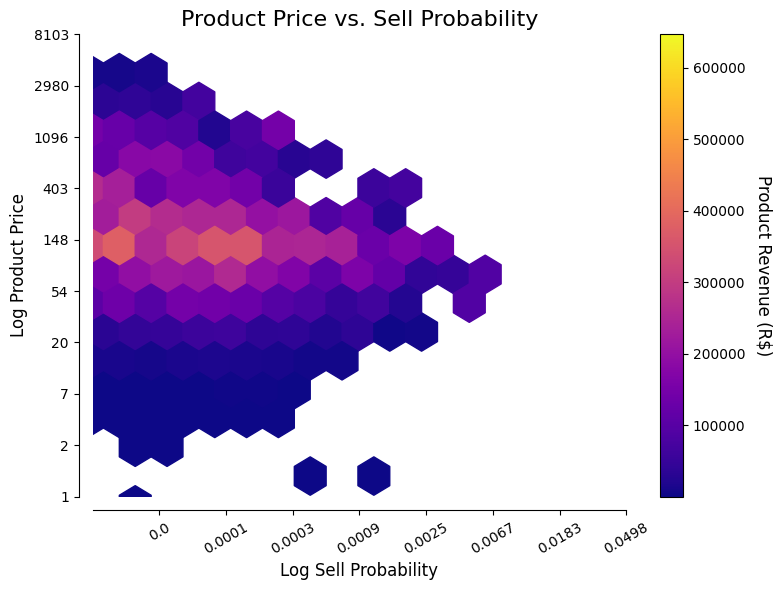

In [123]:
def custom_plot(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))
        else:
            spine.set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

x = np.log(product_revenue.sell_probability)
y = np.log(product_revenue.price)

fig, ax = plt.subplots(figsize=(8, 6))
custom_plot(ax, ['bottom', 'left'])

plt.title('Product Price vs. Sell Probability', fontsize=16)
plt.xlabel('Log Sell Probability', fontsize=12)
plt.ylabel('Log Product Price', fontsize=12)

plt.xlim(-11, -3)
plt.ylim(0, 9)
plt.yticks(range(10), [int(np.exp(i)) for i in range(10)], fontsize=10)
plt.xticks(range(-10, -2), [round(np.exp(i), 4) for i in range(-10, -2)], fontsize=10, rotation=30)

hb = ax.hexbin(
    x, y,
    gridsize=14,
    C=product_revenue.total,
    reduce_C_function=np.sum,
    cmap='plasma'
)

cb = fig.colorbar(hb, ax=ax)
cb.set_label('Product Revenue (R$)', rotation=270, labelpad=20, fontsize=12)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Kuliah/E-Commerce Public Dataset/product_probability_sum_custom.png', dpi=300)
plt.show()

Terlihat bahwa produk yang menghasilkan pendapatan terbesar adalah produk kelas menengah yang sering dijual

### Pertanyaan 2: Lokasi geografis manakah yang memiliki pelanggan terbanyak?

In [124]:
# Hitung jumlah state unik per kode pos
other_state_geolocation = data['geolocation'].groupby('geolocation_zip_code_prefix')['geolocation_state'] \
                        .nunique().reset_index(name='count')

# Tampilkan jumlah kode pos yang memiliki >= 2 state
other_state_geolocation[other_state_geolocation['count'] >= 2].shape

# Ambil 1 state saja per kode pos (menghapus duplikat)
max_state = data['geolocation'].groupby(['geolocation_zip_code_prefix', 'geolocation_state']) \
            .size().reset_index(name='count') \
            .drop_duplicates(subset='geolocation_zip_code_prefix') \
            .drop('count', axis=1)

In [125]:
# Hitung median latitude & longitude per kode pos + city + state
geolocation_silver = data['geolocation'].groupby(
    ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']
)[['geolocation_lat', 'geolocation_lng']].median().reset_index()

# Gabungkan dengan max_state untuk memastikan 1 state per kode pos
geolocation_silver = geolocation_silver.merge(
    max_state,
    on=['geolocation_zip_code_prefix', 'geolocation_state'],
    how='inner'
)

In [126]:
customers_silver = customers_df.merge(
    geolocation_silver,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)

In [127]:
customers_silver.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_score,review_comment_message,review_creation_date,review_answer_timestamp,indikator_komentar,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,4.0,NaN,2017-05-26,2017-05-30 22:34:40,0.0,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,5.0,NaN,2018-01-30,2018-02-10 22:43:29,0.0,9790,sao bernardo do campo,SP,-23.731211,-46.541206
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,5.0,NaN,2018-01-30,2018-02-10 22:43:29,0.0,9790,são bernardo do campo,SP,-23.727018,-46.543192
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5.0,NaN,2018-06-15,2018-06-15 12:10:59,0.0,1151,sao paulo,SP,-23.531294,-46.657039
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5.0,NaN,2018-06-15,2018-06-15 12:10:59,0.0,1151,são paulo,SP,-23.531294,-46.656866
5,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,5.0,NaN,2018-03-29,2018-04-02 18:36:47,0.0,8775,mogi das cruzes,SP,-23.499025,-46.183436
6,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,1.0,13056,campinas,SP,-22.974331,-47.142173
7,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,5.0,Loja responsável,2017-09-29,2017-10-01 21:52:53,1.0,89254,jaragua do sul,SC,-26.471435,-49.114562
8,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,5.0,Loja responsável,2017-09-29,2017-10-01 21:52:53,1.0,89254,jaraguá do sul,SC,-26.470583,-49.113512
9,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,5.0,NaN,2018-02-21,2018-02-26 13:53:18,0.0,4534,sao paulo,SP,-23.583998,-46.673524


In [128]:
customers_silver = customers_silver.drop_duplicates(subset='order_id')

In [129]:
customers_silver.to_csv("/content/drive/MyDrive/Kuliah/E-Commerce Public Dataset/geolocation.csv", index=False)

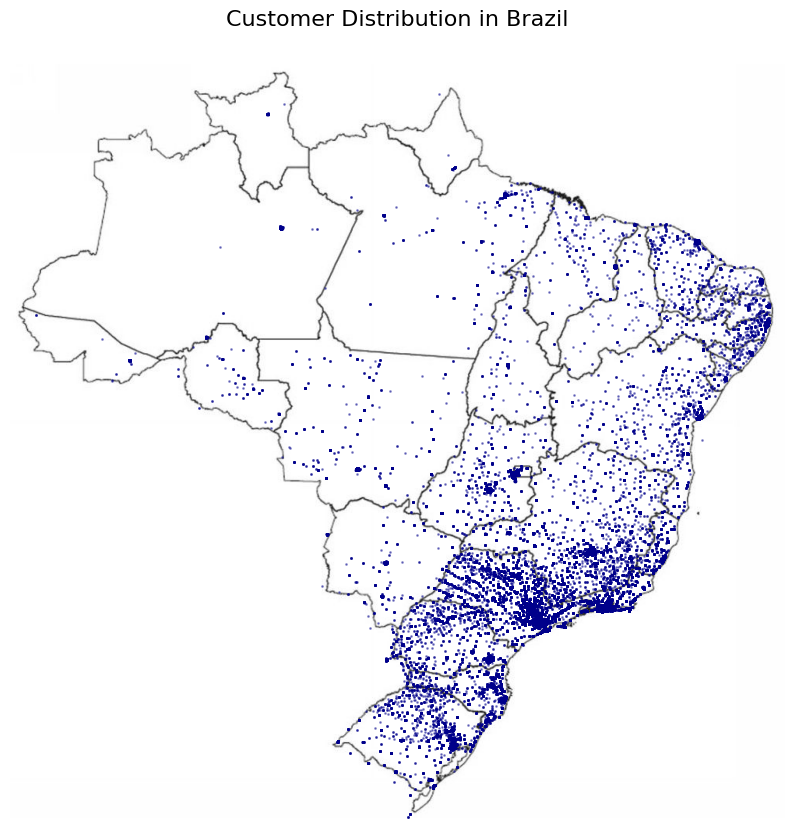

In [132]:
def plot_brazil_map_custom(data):
    brazil = mpimg.imread(urllib.request.urlopen(
        'https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'), 'jpg')

    fig, ax = plt.subplots(figsize=(10,10))

    sc = ax.scatter(
        data['geolocation_lng'],
        data['geolocation_lat'],
        c='darkblue',
        s=1,
        alpha=0.4
    )

    ax.imshow(brazil, extent=[-73.98283055, -33.8, -33.75116944, 5.4], aspect='auto', zorder=-1)
    ax.set_xlim([-74, -34])
    ax.set_ylim([-34, 6])
    ax.axis('off')

    plt.title("Customer Distribution in Brazil", fontsize=16, pad=20)
    plt.show()

plot_brazil_map_custom(customers_silver.drop_duplicates(subset='customer_unique_id'))

Terlihat bahwa banyak pelanggan datang dari negara bagian tenggara dan selatan

## **Conclusion**

*   Produk mana yang paling banyak terjual? Apakah produk tersebut mendapatkan keuntungan yang lebih banyak dari produk yang murah atau yang mahal?
  > Perusahaan tidak selalu menghasilkan keuntungan terbesar dari produk yang paling laku atau paling mahal. Pendapatan lebih banyak datang dari beragam produk yang masing-masing memiliki probabilitas penjualan rendah, biasanya dengan harga antara 50–500 R$.

*   Lokasi geografis manakah yang memiliki pelanggan terbanyak?
  > Pelanggan paling banyak terkonsentrasi di wilayah tenggara dan selatan. Selain itu, kota-kota besar dan ibu kota seperti São Paulo, Rio de Janeiro, dan Porto Alegre memiliki jumlah pelanggan yang lebih tinggi.










